In [2]:
import pandas as pd

In [3]:
tracks_df = pd.read_csv('../data/raw/raw_library_data.csv')

tracks_df.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,...,added_time,song_name,short_pts,med_pts,long_pts,time_pts,total_pts,artist_short_pts,artist_med_pts,artist_long_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0,...,2021-05-14 19:10:01+00:00,Entrégala,3.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,1,...,2021-05-13 22:30:16+00:00,Pretty Please,3.0,0.0,0.0,3.0,6.0,0.0,0.0,0.0
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,1,...,2021-05-13 03:41:42+00:00,LA CANCIÓN,0.0,0.0,0.0,3.0,3.0,0.0,0.0,0.0
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0,...,2021-05-11 16:09:42+00:00,Professional,0.0,0.0,0.0,3.0,6.0,3.0,0.0,0.0
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0,...,2021-05-11 16:09:32+00:00,Adaptation,0.0,0.0,0.0,3.0,6.0,3.0,0.0,0.0


In [12]:
track_features = tracks_df.drop(columns = ['short_pts', 'med_pts', 'long_pts', 'time_pts', 'artist_short_pts', 'artist_med_pts', 'artist_long_pts', 'added_time', 'song_name', 'mode', 'artist_id'])

track_features.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,total_pts
0,46lZpwebFWgqad5CX1iv6r,0.0637,0.919,158040,0.672,0.014400,10,0.0597,-3.404,0.1310,117.002,0.425,6.0
1,5Pc594FhDA2Fa2prE75GT0,0.0311,0.906,194607,0.474,0.000005,1,0.2860,-6.124,0.1940,106.976,0.656,6.0
2,0fea68AdmYNygeTGI4RC18,0.1520,0.754,242573,0.646,0.000018,7,0.1080,-5.795,0.3170,176.089,0.429,3.0
3,5ZicFGBDAi9J2YCVesboUp,0.1620,0.405,368720,0.619,0.000334,11,0.0788,-8.920,0.0615,120.092,0.234,6.0
4,4pHQ9RYFhn3W0ha5KEuMnj,0.1510,0.642,283933,0.790,0.000583,11,0.3050,-6.800,0.0681,114.960,0.613,6.0


In [5]:
import numpy as np

def train_validate_test_split(df, train_percent=.6, validate_percent=.2, seed=101):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df.index)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.iloc[perm[:train_end]]
    validate = df.iloc[perm[train_end:validate_end]]
    test = df.iloc[perm[validate_end:]]
    return train, validate, test

In [13]:
train, validate, test = train_validate_test_split(track_features)

print(len(train))
print(len(validate))
print(len(test))

880
293
295


In [14]:
train.to_csv('../data/processed/library_train.csv')

train.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,total_pts
765,0ifooM33X1iBxVYyOkSbXW,0.0431,0.853,220173,0.663,0.000009,7,0.0891,-6.955,0.0755,113.998,0.864,3.0
115,5CFJRZRq6sdKKtRwNPWbYv,0.4300,0.619,174960,0.589,0.000392,1,0.3780,-6.531,0.1240,143.896,0.158,5.0
183,2ofOe2OaXFpZF5ETbsc7Qu,0.2180,0.692,339733,0.608,0.000000,8,0.3480,-5.233,0.0410,125.012,0.449,4.0
90,0M46BR7Uwi3Sa0LJjWRXW9,0.7150,0.630,360107,0.682,0.000000,6,0.1150,-7.317,0.0551,112.077,0.391,5.0
1344,27GzRZ04LtfU6YuA21OA98,0.1560,0.728,197278,0.721,0.000260,10,0.1430,-6.770,0.0419,95.039,0.148,1.0


In [15]:
validate.to_csv('../data/processed/library_validate.csv')

validate.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,total_pts
1230,1sQBPGypjSgEgJZvD8u8ty,0.2590,0.389,292885,0.507,0.044100,11,0.142,-9.026,0.0621,74.718,0.364,0.0
69,60ynsPSSKe6O3sfwRnIBRf,0.2080,0.749,226987,0.463,0.037100,11,0.337,-8.433,0.0828,90.028,0.190,3.0
702,23SZWX2IaDnxmhFsSLvkG2,0.0207,0.598,357653,0.713,0.000175,6,0.431,-3.625,0.0326,91.964,0.118,3.0
572,0wXuerDYiBnERgIpbb3JBR,0.1670,0.743,326933,0.347,0.009510,1,0.103,-11.174,0.1210,160.143,0.572,1.0
1198,5iSEsR6NKjlC9SrIJkyL3k,0.4840,0.630,295293,0.605,0.000093,0,0.298,-8.951,0.0414,115.277,0.266,3.0


In [16]:
test.to_csv('../data/processed/library_test.csv')

test.head()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,speechiness,tempo,valence,total_pts
1437,0rBMP6VVGRgwnzZCLpijyl,0.30800,0.696,227427,0.583,0.000000,3,0.0964,-9.351,0.3010,137.079,0.524,2.0
93,6jHO1z47fxjU1v8j37boQP,0.34600,0.641,286680,0.539,0.000007,5,0.0837,-6.351,0.0463,148.004,0.436,5.0
76,1ggYjU6zdFHgANcku82boU,0.39800,0.668,194871,0.547,0.076600,1,0.0931,-8.024,0.0353,83.500,0.192,3.0
1313,1HpzOCZbNWzxvvXfSGtSrX,0.00548,0.605,176417,0.664,0.000003,8,0.2040,-7.162,0.0316,103.997,0.164,0.0
889,2AT8iROs4FQueDv2c8q2KE,0.00616,0.288,201726,0.758,0.000000,6,0.3030,-5.692,0.0371,97.094,0.619,3.0


In [1]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import pandas as pd 
import numpy as np

In [3]:
## only run this chunk if the dfs are not in memory yet

test = pd.read_csv('../data/processed/library_test.csv')

train = pd.read_csv('../data/processed/library_train.csv')

validate = pd.read_csv('../data/processed/library_validate.csv')

In [4]:
pipeline = Pipeline([
    ('std_scaler', MinMaxScaler())
])

In [15]:
#scaling features
X_train = train.drop(columns = ['id', 'total_pts', 'Unnamed: 0'])

X_train_scaled = pipeline.fit_transform(X_train)

In [6]:
#preparing target
from sklearn.preprocessing import LabelEncoder

y_train = train['total_pts']

y_train_scaled = LabelEncoder().fit_transform(y_train)

In [7]:
# Making and comparing models

# Model imports
from sklearn.linear_model import LogisticRegressionCV, RidgeClassifierCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import f1_score, make_scorer

import warnings 
from sklearn.exceptions import ConvergenceWarning

# Filter out warnings from models
warnings.filterwarnings('ignore', category = ConvergenceWarning)
warnings.filterwarnings('ignore', category = DeprecationWarning)

In [16]:
forest = RandomForestClassifier(random_state=42, max_depth=5, max_features=11) # Set by GridSearchCV below
forest.fit(X_train_scaled, y_train_scaled)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature rankings
print("Feature ranking:")
  
for f in range(len(importances)):
    print("%d. %s %f " % (f + 1, 
            X_train.columns[f], 
            importances[indices[f]]))

Feature ranking:
1. acousticness 0.170919 
2. danceability 0.120701 
3. duration_ms 0.120276 
4. energy 0.102963 
5. instrumentalness 0.097586 
6. key 0.091602 
7. liveness 0.082035 
8. loudness 0.066437 
9. speechiness 0.062694 
10. tempo 0.051276 
11. valence 0.033509 


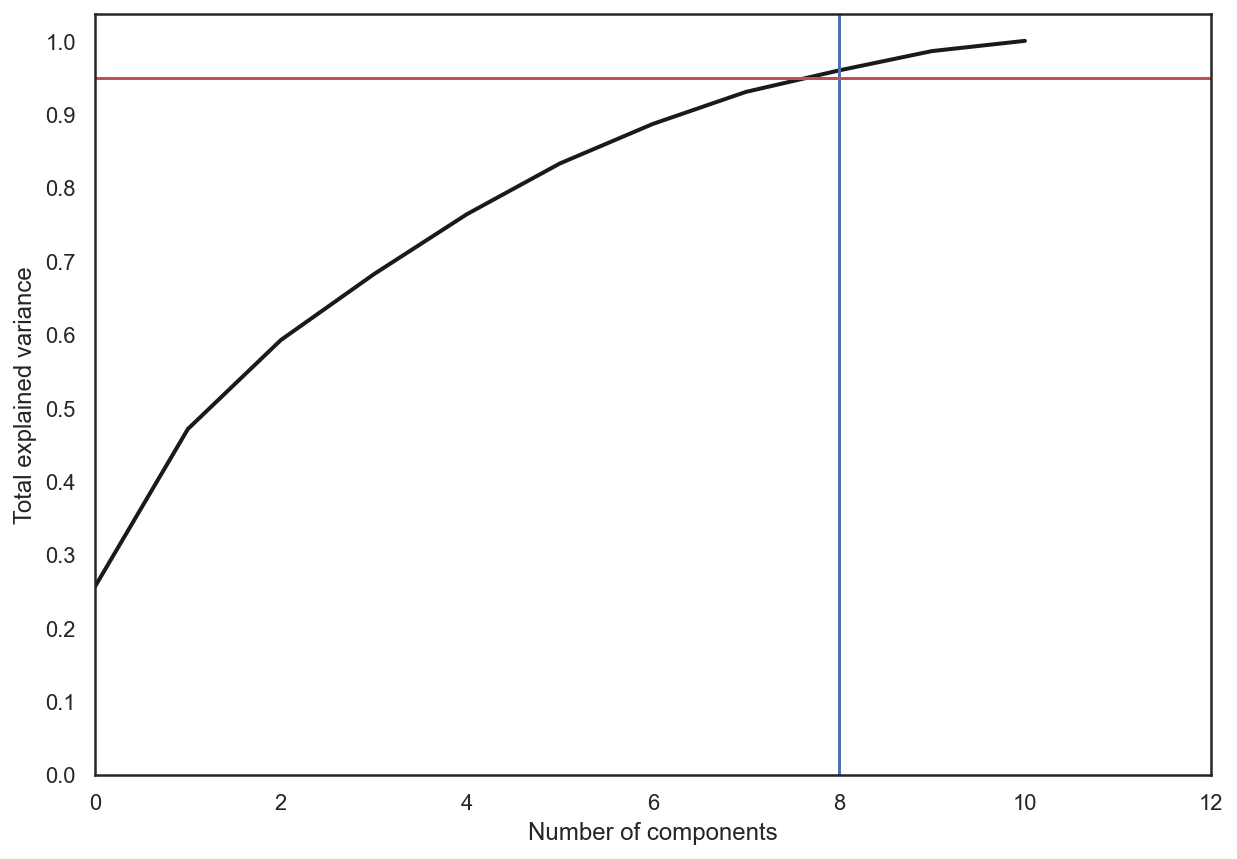

In [20]:
from sklearn import decomposition
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pca = decomposition.PCA().fit(X_train_scaled)

plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 12)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(8, c='b') # Tune this so that you obtain at least a 95% total variance explained
plt.axhline(0.95, c='r')
plt.show()

In [24]:
# getting test sets ready

X_test = test.drop(columns = ['id', 'total_pts', 'Unnamed: 0'])

X_test_scaled = pipeline.fit_transform(X_test)


y_test = test['total_pts']

y_test_scaled = LabelEncoder().fit_transform(y_test)

In [38]:
from sklearn.metrics import f1_score

f1_results = pd.DataFrame(columns = ['model', 'F1 Scores', 'F1 Average', 'F1 Weighted Average'])

In [43]:
# comparing F1 scores for a few different models
def model_scores(model, name):

    #making predictions
    y_pred = model.predict(X_test_scaled)
    f1 = f1_score(y_test_scaled, y_pred, average = None)
    f1_average = f1_score(y_test_scaled, y_pred, average = 'macro')
    f1_average_weighted = f1_score(y_test_scaled, y_pred, average = 'weighted')

    print(f1, f1_average, f1_average_weighted)

    #printing confusion matrix
    print(pd.crosstab(y_test_scaled, y_pred, rownames=['Actual Score'], colnames=['Predicted Score']))             

In [44]:
rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)

rf_classifier.fit(X_train_scaled, y_train_scaled)

model_scores(rf_classifier, 'Random Forest')

[0.3853211  0.09375    0.1509434  0.46428571 0.         0.
 0.         0.        ] 0.13678752642869507 0.3003068363901101
Predicted Score   0   1  2   3  4
Actual Score                     
0                42  10  4  41  0
1                22   3  3  13  0
2                20   3  4  10  0
3                31   4  2  52  1
4                 5   1  1   6  0
5                 1   1  0   4  0
6                 0   1  1   8  0
7                 0   0  1   0  0


In [51]:
# Dataframe to hold results
model_results = pd.DataFrame(columns = ['model', 'cv_mean', 'cv_std'])

scorer = make_scorer(f1_score, greater_is_better=True, average = 'macro')

def cv_model(train, train_labels, model, name, model_results=None):
    cv_scores = cross_val_score(model, train, train_labels, cv = 10, scoring=scorer, n_jobs = -1)
    print(f'10 Fold CV Score: {round(cv_scores.mean(), 5)} with std: {round(cv_scores.std(), 5)}')
    if model_results is not None:
        model_results = model_results.append(pd.DataFrame({'model': name, 
                                                           'cv_mean': cv_scores.mean(), 
                                                            'cv_std': cv_scores.std()},
                                                           index = [0]),
                                             ignore_index = True)

        return model_results

In [52]:
model_results = cv_model(X_train_scaled, y_train_scaled, RidgeClassifierCV(), 'RIDGE', model_results)

C:\Users\madat\AppData\Local\Continuum\anaconda3\envs\spotify-acrostic\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"
10 Fold CV Score: 0.11295 with std: 0.01727


In [ ]:
for n in [5, 10, 20]:
    print(f'\nKNN with {n} neighbors\n')
    model_results = cv_model(train_set, train_labels, 
                             KNeighborsClassifier(n_neighbors = n),
                             f'knn-{n}', model_results)